In [1]:
import numpy as np
import h5py 
import cv2
import matplotlib.pyplot as plt

with h5py.File('../../CodePass2/runs/finale.hdf5', 'r') as f:
    # read the data
    positions = f['x'][:]
    properties = f['properties'][:][0]
    p = f['p'][:]

Text(-0.05, 0.5, 'Dorsal view')

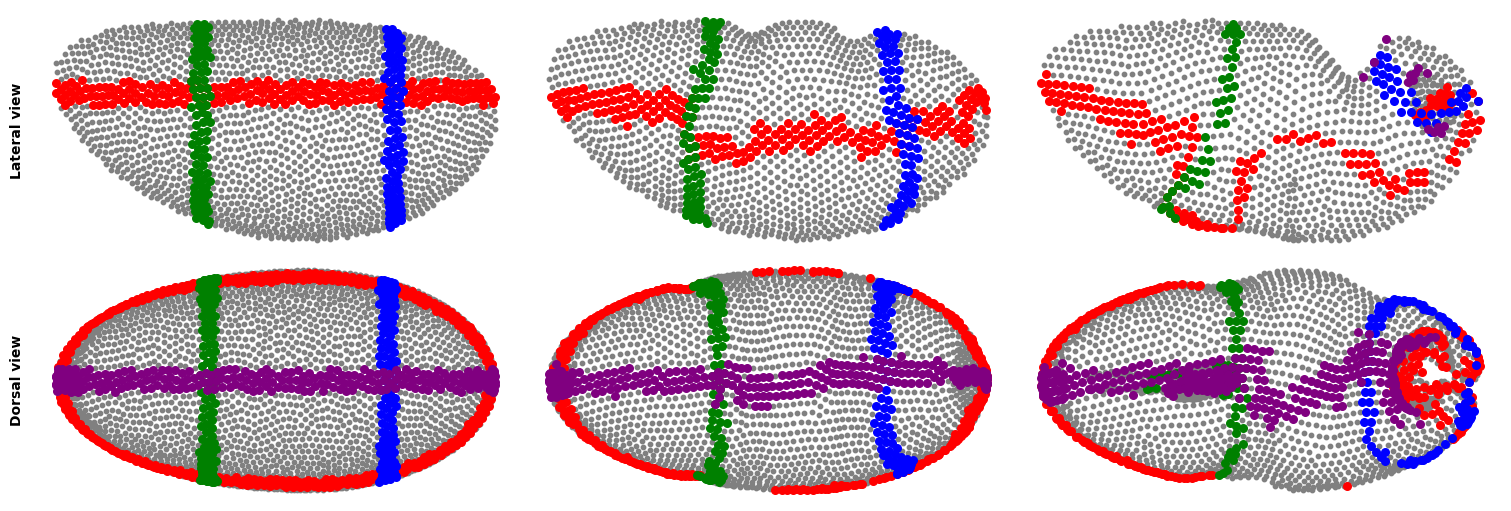

In [68]:
x = positions[0,:,0]
y = positions[0,:,1]
z = positions[0,:,2]

w = 5

p = 5
stripe1 = (z > p)*(z < p+w)
p = -30
stripe2 = (x>p)*(x<p+w)
p = 20
stripe3 = (x>p)*(x<p+w)
p = -2.5
stripe4 = (y>p)*(y<p+w)

all_stripes = stripe1 | stripe2 | stripe3 | stripe4
stripes_lst = [stripe1, stripe2, stripe3, stripe4]
colors = ['r','g','b', "purple"]

fig, axs = plt.subplots(2,3, figsize=(15,5), constrained_layout=True)
axind = 0

upper_axs = axs[0,:]
lower_axs = axs[1,:]

for t in [0,500,3000]:
    y = positions[t,:,1]
    x = positions[t,:,0]
    z = positions[t,:,2]

    ycut = 8
    # lateral view
    upper_axs[axind].scatter(x[~all_stripes][y[~all_stripes]>ycut], z[~all_stripes][y[~all_stripes]>ycut], c="grey", s = 10)
    for c, stripe in zip(colors, stripes_lst):
        upper_axs[axind].scatter(x[stripe][y[stripe]>ycut], z[stripe][y[stripe]>ycut], c=c, s = 30)

    # remove the ticks
    upper_axs[axind].axis('off')

    # dorsal view
    zcut = 0
    lower_axs[axind].scatter(x[~all_stripes][z[~all_stripes]>zcut], y[~all_stripes][z[~all_stripes]>zcut], c="grey", s = 10)
    for c, stripe in zip(colors, stripes_lst):
        lower_axs[axind].scatter(x[stripe][z[stripe]>zcut], y[stripe][z[stripe]>zcut], c=c, s = 30)

    # remove the ticks
    lower_axs[axind].axis('off')

    axind += 1


upper_axs[0].annotate('Lateral view', (-0.05, 0.5), xycoords = 'axes fraction', rotation = 90, va = 'center', fontweight = 'bold', fontsize = 10)
lower_axs[0].annotate('Dorsal view', (-0.05, 0.5), xycoords = 'axes fraction', rotation = 90, va = 'center', fontweight = 'bold', fontsize = 10)


In [78]:
y

array([  0.22744398,  -1.0628173 ,  -3.179316  , ...,  22.279713  ,
       -20.769484  ,   1.5182306 ], dtype=float32)

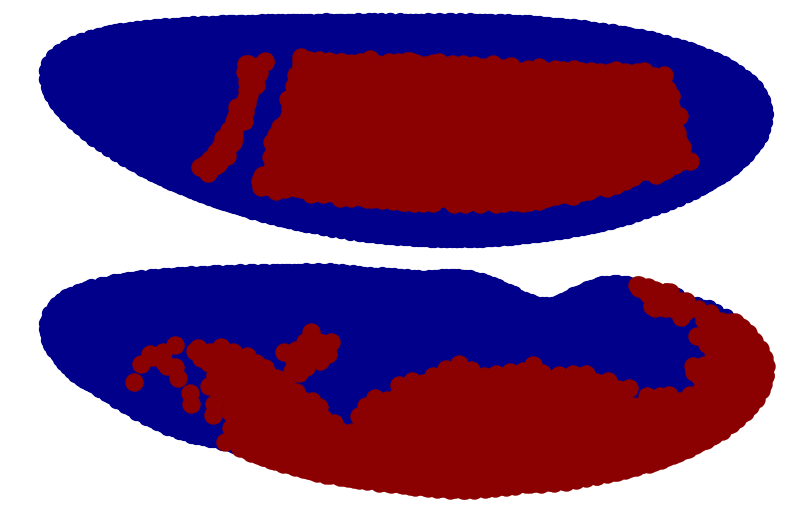

In [100]:

fig, axs = plt.subplots(2,1, figsize=(8,5), constrained_layout=True)

gb = properties == 1
axind = 0

for t in [0,-1]:
    y = positions[t,:,1]
    x = positions[t,:,0]
    z = positions[t,:,2]


    # lateral view
    axs[axind].scatter(x[~gb], z[~gb], c = "darkblue", s = 100)
    axs[axind].scatter(x[gb], z[gb], c = "darkred", s = 150)

    axs[axind].axis('off')

    axind += 1

